In [1]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing, manual_tracing_multiple

In [2]:
numbers = [2,4]

In [3]:
test = manual_tracing_multiple(numbers)

In [4]:
test.names

['MAX_20170123_I01_003-Scene-4-P4-split_T2.ome.txt',
 'MAX_20170123_I01_003-Scene-4-P4-split_T3.ome.txt',
 'MAX_20170123_I01_003-Scene-4-P4-split_T4.ome.txt']

In [5]:
num = 20

In [6]:
X, Y = test.get_X_Y_data(num)

In [7]:
nodes, edges, cells = test.get_nodes_edges_cells(num)

File 20 used a Cutoff value ------> 16


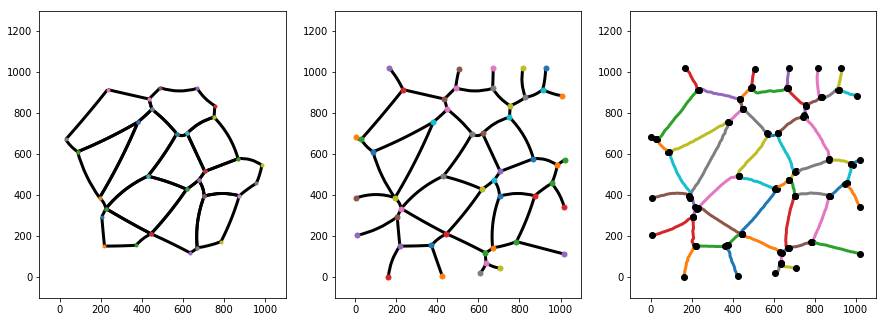

In [8]:
import matplotlib.pyplot as plt


# Plot fitted edges

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,8))
ax1.set(xlim = [-100,1100], ylim = [-100,1300], aspect = 1)
#ax1.set(xlim = [400,800], ylim = [0,800], aspect = 1)
ax.set(xlim = [-100,1100], ylim = [-100,1300], aspect = 1)
ax2.set(xlim =[-100,1100], ylim = [-100,1300], aspect = 1)
[c.plot(ax, lw = 3) for c in cells]

[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]

# [n.plot(ax2, markersize = 10) for n in nodes]
# [n.plot(ax2, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax2, lw = 3) for e in edges]

for i in range(len(X)):
    ax2.plot(X[i], Y[i], lw = 3)
    ax2.plot(X[i][0], Y[i][0], 'ok')
    ax2.plot(X[i][-1], Y[i][-1], 'ok')


plt.show()

In [9]:
old_nodes, old_dict, initial_cells , e= test.initial_numbering(0)

File 0 used a Cutoff value ------> 14


In [10]:
colonies, old_dictionary = test.first_computation(0)

File 0 used a Cutoff value ------> 14
     fun: 1.4470923264249578
     jac: array([0.04460546, 0.04447557, 0.04439187, 0.04445395, 0.04445204,
       0.0445458 , 0.04419756, 0.04563306, 0.04401857, 0.04478027,
       0.04394384, 0.0443445 , 0.04490055, 0.04431087, 0.04447018,
       0.04422526, 0.04478243, 0.04483874, 0.04472071, 0.04440856,
       0.04481541, 0.04479314, 0.04430975, 0.0440291 , 0.04431136,
       0.04524171, 0.0448823 , 0.04416864, 0.04440446, 0.04526368,
       0.04493558, 0.04411878, 0.04411027, 0.04462874, 0.04479553,
       0.04432943, 0.04473872, 0.04481213, 0.04467736, 0.04414929,
       0.04474394, 0.04456933, 0.0446094 , 0.04438226, 0.04472797,
       0.04514694, 0.04433849, 0.04464059, 0.04455894, 0.04466705,
       0.04430637, 0.04419379, 0.04371881, 0.0446547 , 0.04410838,
       0.04483344, 0.04419383, 0.04428916, 0.04456815, 0.04452726,
       0.04490133, 0.04440711, 0.04445776, 0.04443134, 0.04417874])
 message: 'Optimization terminated successfully.'
 

In [11]:
edges = colonies['0'].tot_edges
cells = colonies['0'].cells

In [12]:
print([e.pressure for e in cells])

[0.0002109617054550357, 0.0015836527865195793, 0.009853375835939168, 0.00484084884270229, -0.0007927850374534592, -0.0019003388231957252, -0.004262293049333747, -0.0038383205007134027, -0.00569510175991974, 0.0]


In [13]:
index = 0
numbers =[0,1]

In [14]:
colonies[str(numbers[index + 1])], new_dictionary = test.track_timestep(colonies[str(numbers[index])], old_dictionary, index + 1)

File 1 used a Cutoff value ------> 14


In [15]:
tensions, P_T, A = colonies[str(numbers[index+1])].calculate_tension()
pressures, P_P, B = colonies[str(numbers[index+1])].calculate_pressure()

     fun: 1.3672718767113328
     jac: array([0.04349679, 0.04341006, 0.04380092, 0.04359013, 0.04374269,
       0.04300717, 0.04387251, 0.04305166, 0.04291546, 0.04345158,
       0.04371747, 0.04351079, 0.04324037, 0.04327205, 0.04358071,
       0.04357257, 0.04323804, 0.04332304, 0.04359743, 0.04324597,
       0.04344359, 0.04344061, 0.04347092, 0.04356751, 0.04281801,
       0.04350641, 0.04381582, 0.0438002 , 0.04355164, 0.04342321,
       0.04349229, 0.04332435, 0.04258299, 0.04374909, 0.04338579,
       0.04301116, 0.04339384, 0.04362804, 0.04325713, 0.04336746,
       0.04355133, 0.0434275 , 0.04349482, 0.04304567, 0.04372796,
       0.04322258, 0.04295509, 0.04347852, 0.04366714, 0.04318395,
       0.04363915, 0.04341903, 0.04347906, 0.0435712 , 0.04316214,
       0.0434843 , 0.04313578, 0.04428662, 0.042992  , 0.04268056,
       0.04323485, 0.04321399, 0.04381692])
 message: 'Optimization terminated successfully.'
    nfev: 2439
     nit: 37
    njev: 37
  status: 0
 success: 

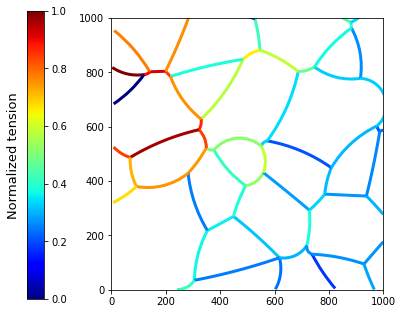

In [25]:
# Plot 
import pylab
import matplotlib.pyplot as plt
index = '1'
edges = colonies[index].tot_edges
tensions = [e.tension for e in edges]
fig, ax = plt.subplots(1,1,figsize=(8,5))
colonies[index].plot_tensions(ax, fig, tensions)

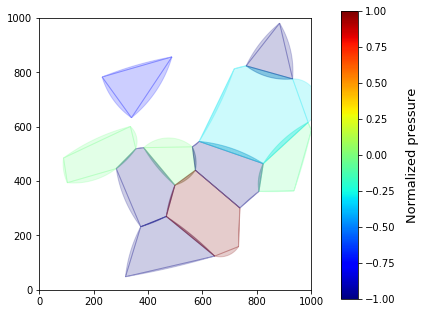

In [22]:
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
colonies['0'].plot_pressures(ax, fig, pressures)

In [16]:
[c.guess_pressure for c in colonies['1'].cells]

[0.0002109617054550357,
 -0.0007927850374534592,
 0.00484084884270229,
 [],
 0.009853375835939168,
 0.0015836527865195793,
 -0.0019003388231957252,
 -0.004262293049333747,
 [],
 0.0,
 []]

In [14]:
print([c.label for c in initial_cells])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


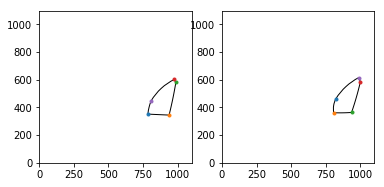

In [25]:
# Check that indices match
import matplotlib.pyplot as plt
fig, (ax, ax1) = plt.subplots(1,2)
index = 6
ax.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
ax1.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
[c.plot(ax) for c in now_cells if c.label == index]
[c.plot(ax1) for c in initial_cells if c.label == index]
plt.show()

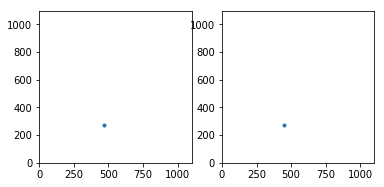

In [20]:
import matplotlib.pyplot as plt
fig, (ax, ax1) = plt.subplots(1,2)
index = 16
ax.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
ax1.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
[c.plot(ax) for c in old_nodes if c.label == index]
[c.plot(ax1) for c in new_nodes if c.label == index]
plt.show()

In [13]:
indices = []
for k, v in combined_dict.items():
    indices.append(k)
print(indices)

[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


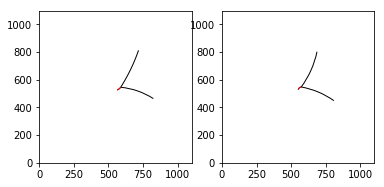

In [42]:
# Check that indices match
import matplotlib.pyplot as plt
fig, (ax, ax1) = plt.subplots(1,2)
index = 20
ax.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
ax1.set(xlim = [0,1100], ylim = [0,1100], aspect = 1)
[e.plot(ax) for e in combined_dict[index][0][:]]
[e.plot(ax1) for e in combined_dict[index][1][:]]
[e.plot(ax, color = 'red') for e in combined_dict[index][0][0:1]]
[e.plot(ax1, color = 'red') for e in combined_dict[index][1][0:1]]
plt.show()

defaultdict(list,
            {0: [[<cell_describe.edge at 0x11540f550>],
             3: [[<cell_describe.edge at 0x11540fa90>,
             4: [[<cell_describe.edge at 0x11540fb38>,
             5: [[<cell_describe.edge at 0x11540fba8>,
             6: [[<cell_describe.edge at 0x11540fc18>,
             7: [[<cell_describe.edge at 0x11540f978>],
             8: [[<cell_describe.edge at 0x11540fc88>,
             9: [[<cell_describe.edge at 0x11540f908>],
             10: [[<cell_describe.edge at 0x11540fc50>,
             11: [[<cell_describe.edge at 0x11540fd30>,
             12: [[<cell_describe.edge at 0x11540fda0>,
             13: [[<cell_describe.edge at 0x11540feb8>,
             14: [[<cell_describe.edge at 0x11540ff28>,
             15: [[<cell_describe.edge at 0x11540ff98>,
             16: [[<cell_describe.edge at 0x11540ffd0>,
             17: [[<cell_describe.edge at 0x11540f9e8>,
             18: [[<cell_describe.edge at 0x115402080>,
             19: [[<cell_describe.e

In [58]:
old_dict[0]

In [47]:
import numpy as np
def func(p):
    # This function gives edge angle with horizontal
    this_vec = np.subtract(p.node_a.loc, p.node_b.loc)
    angle = np.arctan2(this_vec[1], this_vec[0])
    return np.rad2deg((2*np.pi + angle)%(2*np.pi))

In [56]:
func(combined_dict[50][0][2])

176.86364163166743

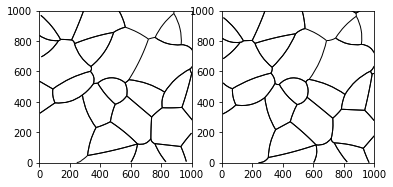

In [13]:
import matplotlib.pyplot as plt
fig, (ax, ax1) = plt.subplots(1,2)

# indices = [0,3,4,5,6,7,8,9,10,11,12,13]
ax.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)
ax1.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)
[e.plot(ax) for index in indices for e in combined_dict[index][0]]
[e.plot(ax1) for index in indices for e in combined_dict[index][1]]
plt.show()

In [238]:
# Calculate tension and pressure
import numpy.linalg as la

# Get tension and pressure
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)
tensions, P_T, A = col1.calculate_tension()

pressures, P_P, B = col1.calculate_pressure()

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')
print('Condition number of tension matrix A:',la.cond(A))
print('Condition number of pressure matrix B:',la.cond(B))
print('Mean value of tension:',np.mean(tensions))
if pressures is not None:
    print('Mean value of pressure:',np.mean(pressures))

     fun: 0.8526716552501888
     jac: array([0.02840126, 0.0282723 , 0.02838606, 0.0284472 , 0.02849297,
       0.02838227, 0.0284816 , 0.02846874, 0.02836746, 0.02843265,
       0.02841474, 0.02850078, 0.02858016, 0.02834524, 0.02834198,
       0.02851315, 0.02833146, 0.02846496, 0.02847329, 0.02838866,
       0.02849364, 0.02845706, 0.02835767, 0.02845667, 0.02837405,
       0.02845322, 0.0283865 , 0.02834763, 0.02839142, 0.02848481,
       0.02840445, 0.02846459, 0.02837687, 0.02847783, 0.02837116,
       0.02852362, 0.02842656, 0.02847734, 0.02845599, 0.02838396,
       0.02840268, 0.02852457, 0.02842311, 0.02840892, 0.02842534,
       0.02825917, 0.02842408, 0.028388  , 0.02846399, 0.02839778,
       0.02843706, 0.02851058, 0.02834523, 0.0284874 , 0.0284127 ,
       0.02841046, 0.0284021 , 0.02845481, 0.02834092, 0.02837987])
 message: 'Optimization terminated successfully.'
    nfev: 3812
     nit: 61
    njev: 61
  status: 0
 success: True
       x: array([ 2.4662953 ,  1.11634

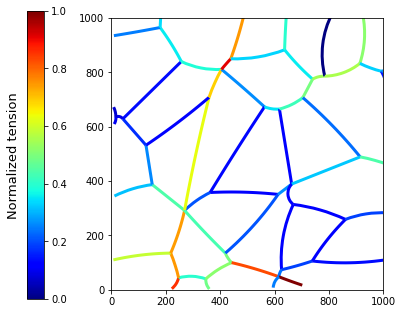

In [239]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions)

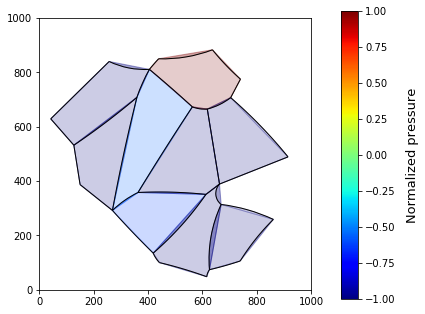

In [240]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))

#col1.plot(ax, fig, tensions, pressures )
col1.plot_pressures(ax, fig, pressures )
[e.plot(ax) for e in col1.edges]
plt.show()

In [37]:
'col' + str(1)

'col1'

In [46]:
dictOfStuff = {} ##Make a Dictionary

x = "Buffalo" ##OR it can equal the input of something, up to you.
y = "new"
dictOfStuff[x] = 4 

In [47]:
dictOfStuff[x] = colony(cells, edges, nodes)

In [48]:
dictOfStuff[y] = 3

In [64]:
len(dictOfStuff[x].edges)

40

In [58]:
dictOfStuff[x].edges[3].tension

[]

In [65]:
dictOfStuff[y]

3